In [55]:
#import loabraries
import pandas as pd
import sklearn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [56]:
#data
data=pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [57]:
#get info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [58]:
# Renaming Columns
df=data.rename({'Delivery Time':'delivery', 'Sorting Time':'sorting'},axis=1)


In [61]:
#convert float to int
df['delivery'] = df['delivery'].astype(int)
df

,delivery,sorting
0,21,10
1,13,4
2,19,6
3,24,9
4,29,10
5,15,6
6,19,7
7,9,3
8,17,10
9,18,9


In [62]:
#get info about data after converting to integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   delivery  21 non-null     int32
 1   sorting   21 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 380.0 bytes


C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery', ylabel='Density'>

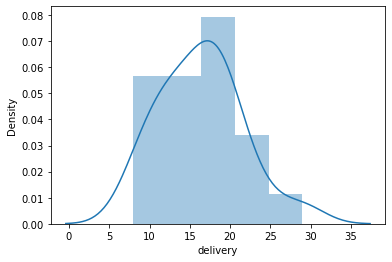

In [64]:
sns.distplot(df['delivery'])

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting', ylabel='Density'>

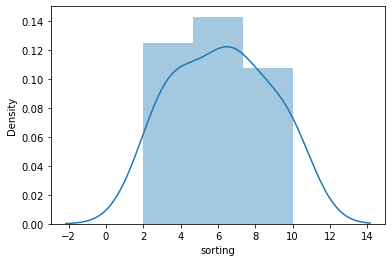

In [65]:
sns.distplot(df['sorting'])

In [68]:
model = smf.ols("sorting~delivery",data= df).fit()

In [69]:
w1=pd.read_csv("delivery_time.csv")
print(w1.shape,"shape of dataset")
print("="*20)


(21, 2) shape of dataset


# correlation

In [70]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


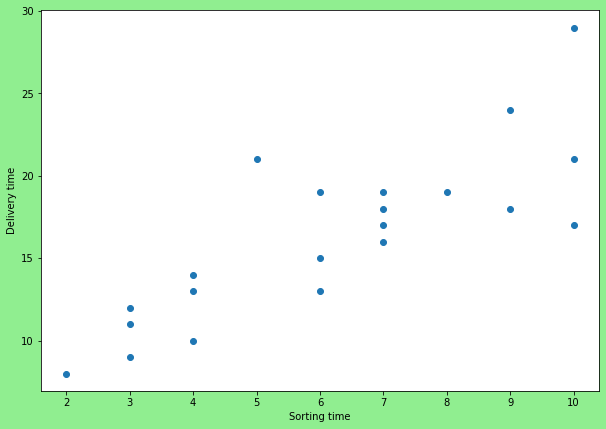

In [73]:
#plot graph for checkinh type of correlation
#predict AT wrt Waist 
# x=i/p y=o/p
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(df.sorting,df.delivery)
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")
plt.show()

by the grapgh we can conclude that given data has positive correlation

<AxesSubplot:xlabel='sorting', ylabel='delivery'>

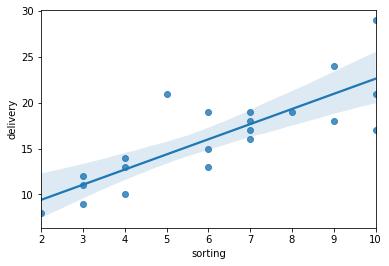

In [74]:
sns.regplot(x=df['sorting'],y=df['delivery'])

In [83]:

lm=LinearRegression()

x=df["sorting"].values.reshape(21,-1)
y=df["delivery"].values.reshape(21,-1)
#plot model
reg_sklearn=lm.fit(x,y)
reg_sklearn
#y= alpha+beta
print(reg_sklearn.coef_) #alpha
print(reg_sklearn.intercept_) #beta


[[1.65327929]]
[6.09874724]


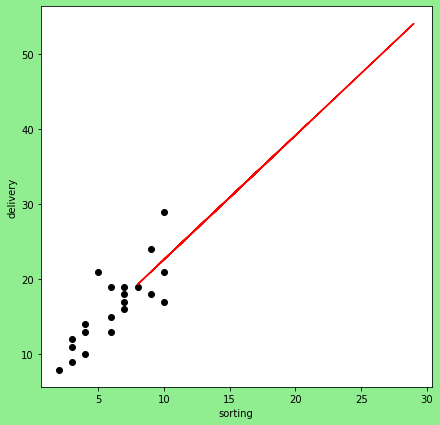

In [86]:
#plot model wrt to sorting time
plt.figure(figsize=(7,7),facecolor="lightgreen")
plt.scatter(df.sorting,df.delivery,color="black")
plt.plot(df.delivery,df.delivery*reg_sklearn.coef_[0]+reg_sklearn.intercept_,color="red")
plt.xlabel("sorting")
plt.ylabel("delivery")

plt.show()

In [88]:
#model validation
pred_train_lm=reg_sklearn.predict(x)
r2_score(df["delivery"],pred_train_lm) #to check whether the modelis good or not,when r2 is = grater than 
#0.8 then the model is better but here it is 0.6 so there is scope of improvement.so we can say that model is not so good.

0.6656733834981836

In [89]:
# model with statmodel

In [90]:
#data
df

,delivery,sorting
0,21,10
1,13,4
2,19,6
3,24,9
4,29,10
5,15,6
6,19,7
7,9,3
8,17,10
9,18,9


In [93]:
first_model=smf.ols("delivery~sorting",data=df).fit()
#pred_statsmodel=first_model.predict(df["sorting"])
#r2+score(df["delivery"],pred_train_lm)

In [94]:
#Coefficients
model.params

Intercept   -0.385948
delivery     0.402638
dtype: float64

In [95]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept   -0.344992
delivery     6.150663
dtype: float64 
 Intercept    0.733890
delivery     0.000007
dtype: float64


In [96]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6656733834981836, 0.6480772457875617)

In [97]:
# Predict for new data point

In [98]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])

In [99]:
data_pred=pd.DataFrame(newdata,columns=['delivery'])


In [100]:
model.predict(data_pred)

0     80.141691
1    120.405510
dtype: float64